In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleaned_iot.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,...,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,...,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55,Mirai-greeth_flood
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,...,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [4]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.763553e+00,7.759537e+04,9.062979e+00,6.635523e+01,9.146945e+03,9.146945e+03,1.807621e-06,8.655842e-02,2.073090e-01,9.057149e-02,...,1.248502e+02,3.345817e+01,1.248978e+02,8.317382e+07,9.497998e+00,1.312711e+01,4.728151e+01,3.147998e+04,9.635824e-02,1.414999e+02
std,2.965660e+02,4.664043e+05,8.936737e+00,1.408680e+01,9.974794e+04,9.974794e+04,8.501385e-04,2.811870e-01,4.053790e-01,2.869989e-01,...,2.420296e+02,1.622552e+02,2.429223e+02,1.703857e+07,8.187710e-01,8.639921e+00,2.294819e+02,3.645895e+05,2.327718e-01,2.105725e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.087155e+00,2.087155e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.581371e+01,1.581371e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.042881e-01,2.781200e+02,1.428000e+01,6.400000e+01,1.174380e+02,1.174380e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405208e+01,3.777740e-01,5.406000e+01,8.334390e+07,9.500000e+00,1.039675e+01,5.059213e-01,1.370916e+00,8.000000e-02,1.415500e+02
max,9.943576e+04,9.815555e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,8.484654e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.252094e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [5]:
# checking whether any null values are there
# we have checked from the above using info, but still by using this we can find

df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [6]:
# from the above, we can find there are no null values

df.duplicated().sum()

65556

In [7]:
df = df.drop_duplicates()

In [8]:
# we have removed the duplicated values
df.shape

(983019, 47)

### Exploratory Data Anaylsis

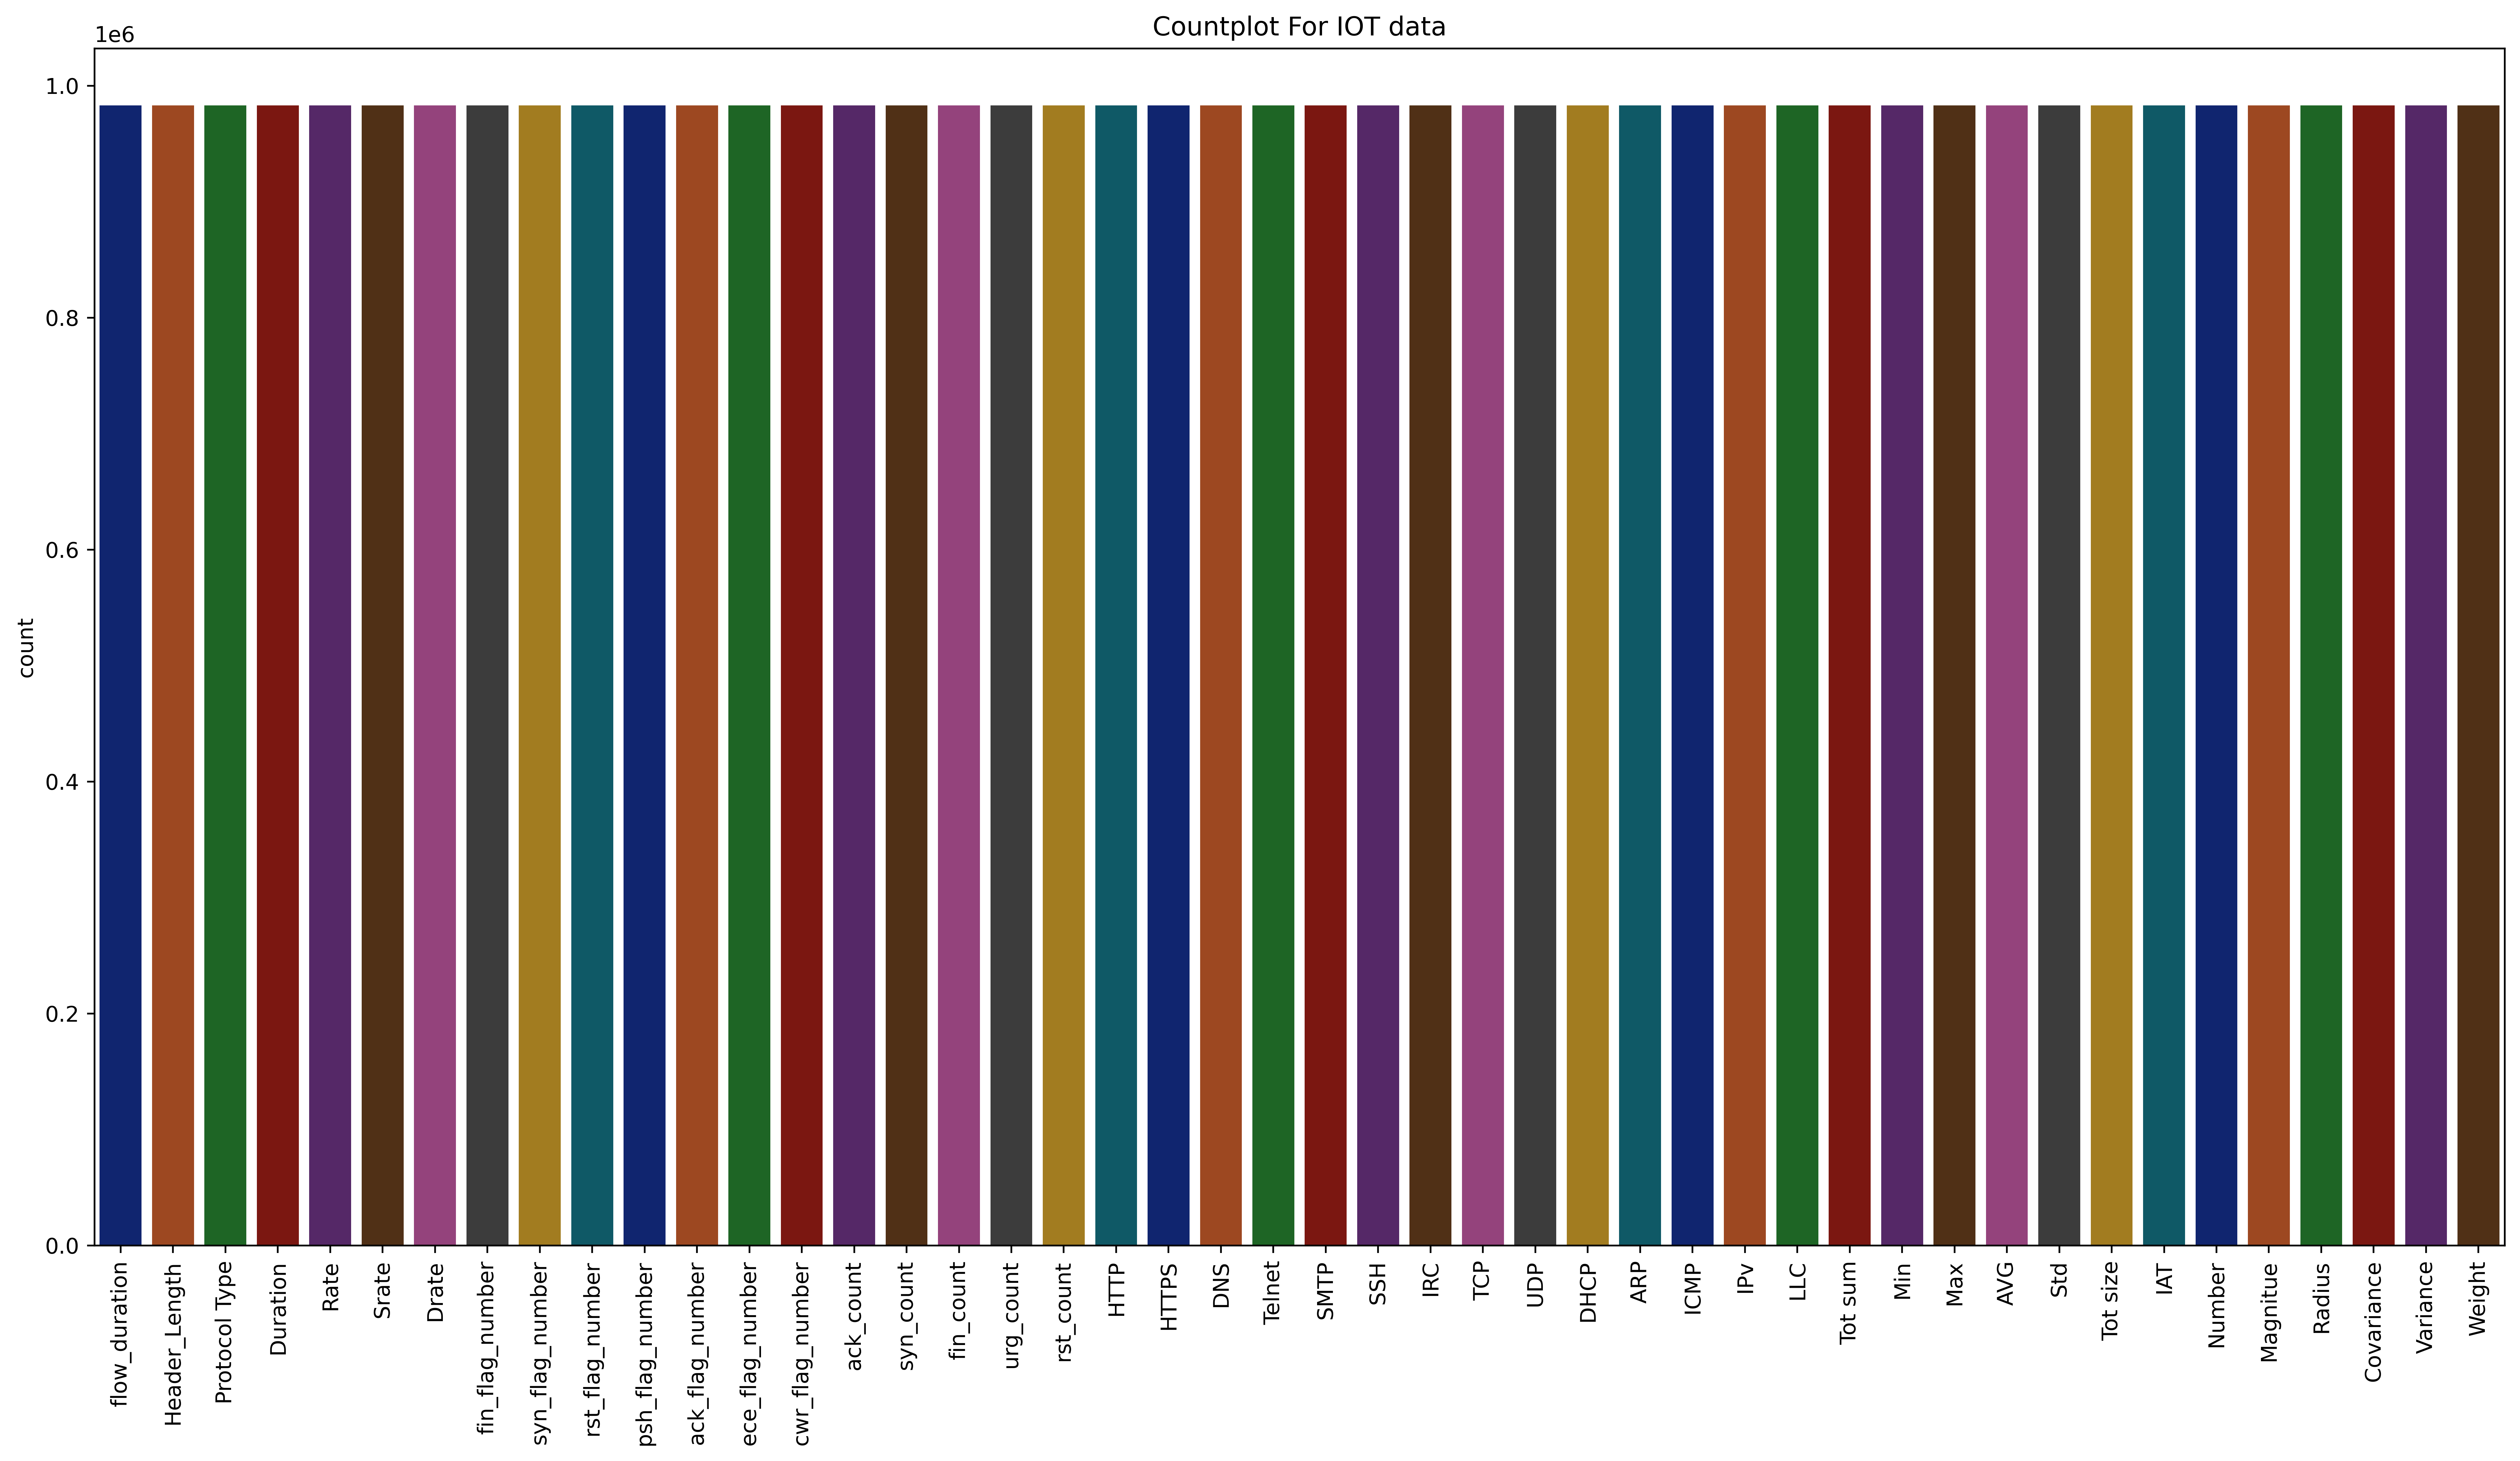

In [9]:
plt.figure(figsize=(20,10),dpi=500)
plt.xticks(rotation=90)
plt.title("Countplot For IOT data")
sns.countplot(df,palette='dark');

<Axes: xlabel='Rate', ylabel='Duration'>

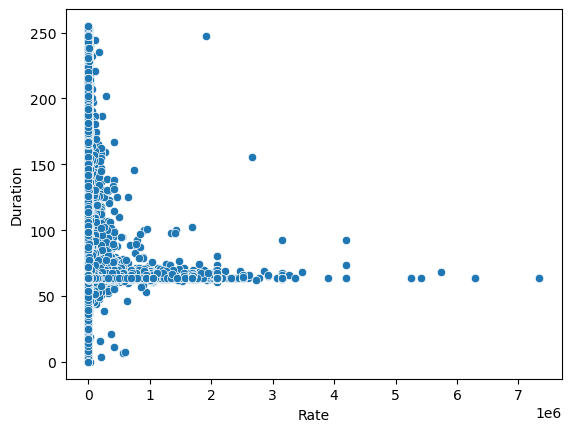

In [10]:
sns.scatterplot(df,x='Rate',y='Duration')

### Model Building

 #### Random FOREST

In [11]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop("label",axis=1)
y = df['label']

In [32]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['label']= label_encoder.fit_transform(df['label']) 

df['label'].unique() 


array([ 9, 20,  6, 21, 19, 23, 12, 25, 10,  8, 13, 14,  1, 22,  4, 24, 18,
        7, 29, 16, 15, 27, 33,  5, 26,  3, 32, 11,  0,  2, 17, 30, 28, 31],
      dtype=int64)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [16]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
pred = model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [19]:
accuracy_score(y_test,pred)

0.9924382684652059

In [20]:
class_report = classification_report(y_test,pred)

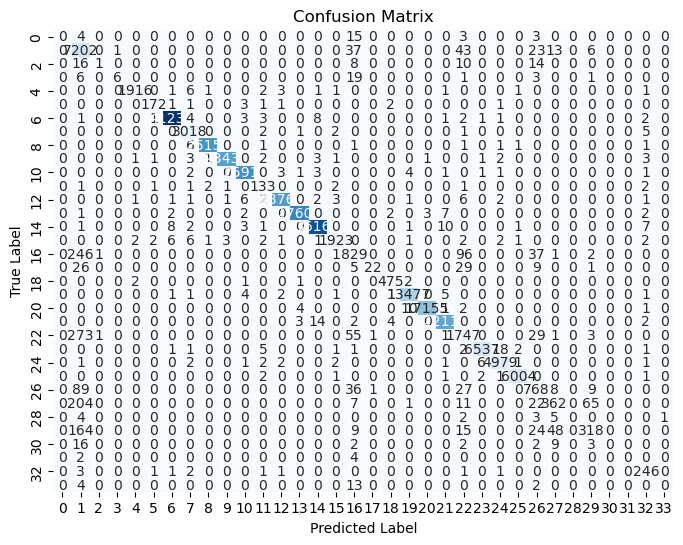

In [21]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

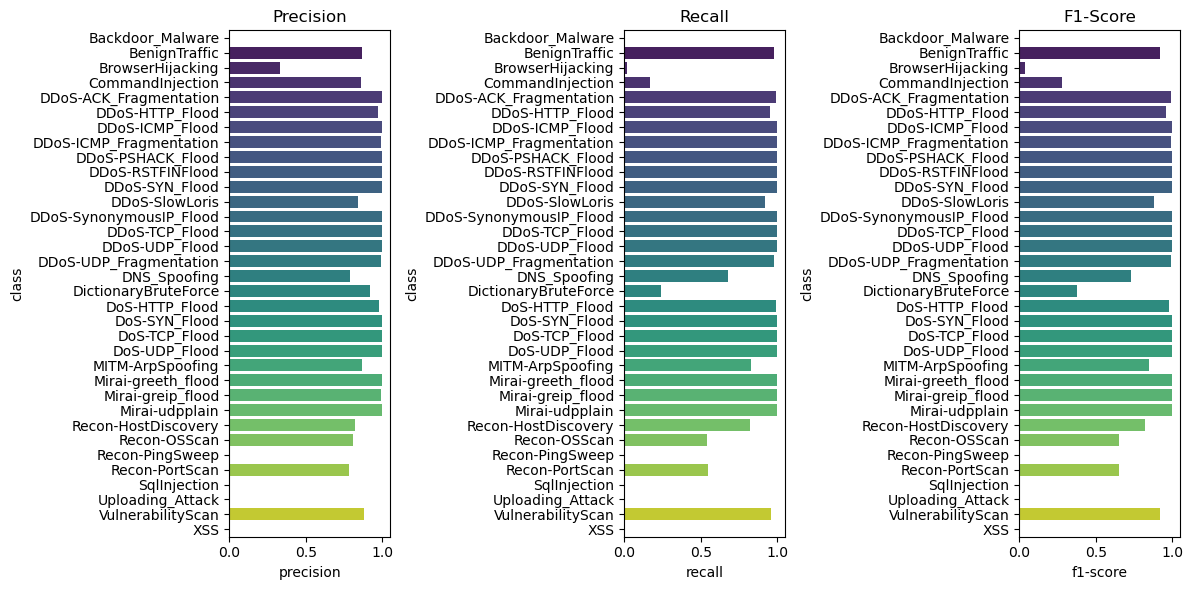

In [22]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in class_report.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()


#### Decision Tree 

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
pred = model.predict(X_test)

In [26]:
accuracy_score(y_test,pred)

0.9923161956691284

In [27]:
a = classification_report(y_test,pred)
print(classification_report(y_test,pred))

                         precision    recall  f1-score   support

       Backdoor_Malware       0.46      0.64      0.53        25
          BenignTraffic       0.92      0.91      0.91      7325
       BrowserHijacking       0.51      0.47      0.49        49
       CommandInjection       0.65      0.56      0.60        36
 DDoS-ACK_Fragmentation       1.00      1.00      1.00      1934
        DDoS-HTTP_Flood       0.98      0.99      0.99       182
        DDoS-ICMP_Flood       1.00      1.00      1.00     41266
DDoS-ICMP_Fragmentation       1.00      1.00      1.00      3029
      DDoS-PSHACK_Flood       1.00      1.00      1.00     25170
       DDoS-RSTFINFlood       1.00      1.00      1.00     23457
         DDoS-SYN_Flood       1.00      1.00      1.00     25928
         DDoS-SlowLoris       0.98      0.97      0.98       144
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     23791
         DDoS-TCP_Flood       1.00      1.00      1.00     27619
         DDoS-UDP_Flood 

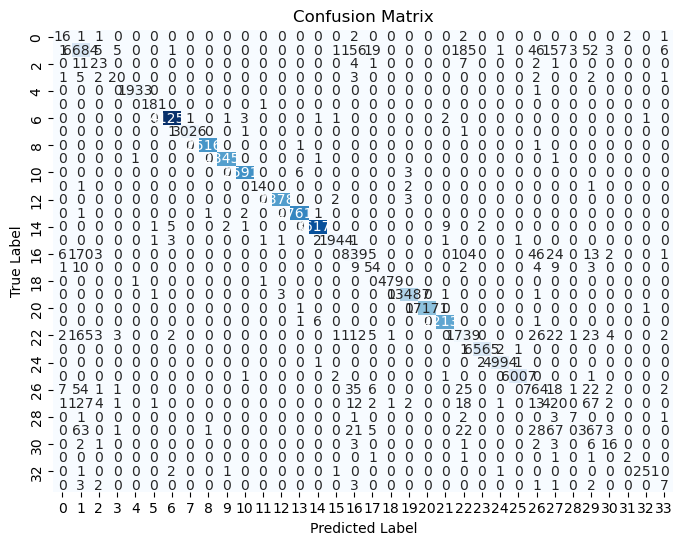

In [28]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

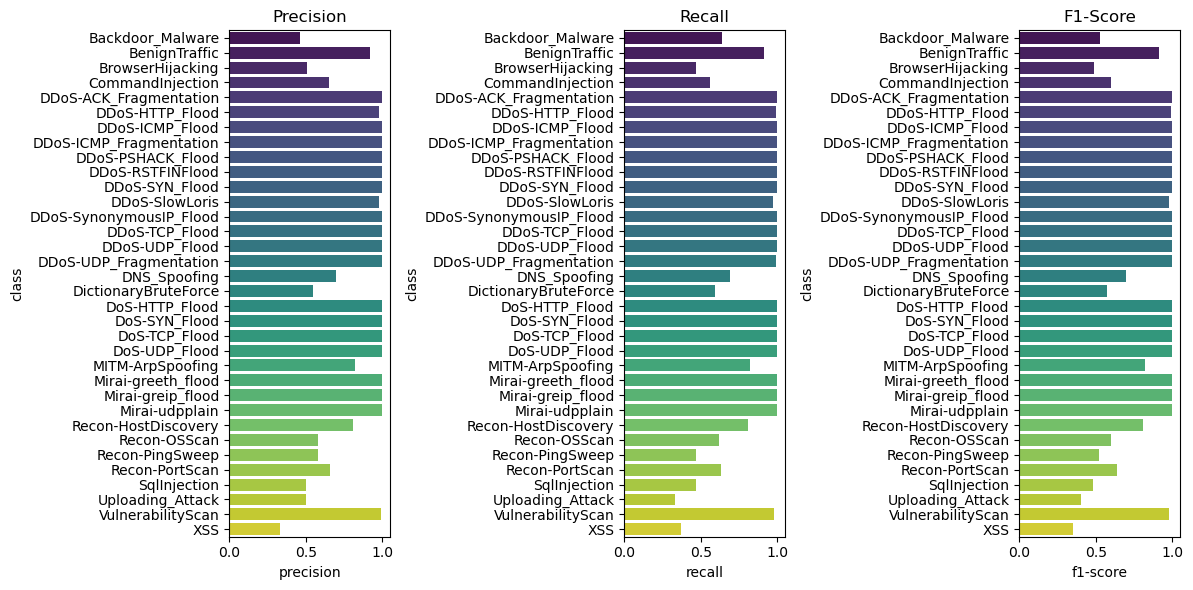

In [29]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in a.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()


For tree based models we don't need to standardize the data.
1. But for other models we need to standardize the data


In [34]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
pred = model.predict(X_test)

In [36]:
accuracy_score(y_test,pred)

0.9917634771757781

In [37]:
b = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        25
           1       0.89      0.96      0.92      7325
           2       0.12      0.02      0.04        49
           3       0.88      0.19      0.32        36
           4       1.00      1.00      1.00      1934
           5       0.97      0.97      0.97       182
           6       1.00      1.00      1.00     41266
           7       1.00      1.00      1.00      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       1.00      1.00      1.00     25928
          11       0.94      0.92      0.93       144
          12       1.00      1.00      1.00     23791
          13       1.00      1.00      1.00     27619
          14       1.00      1.00      1.00     36195
          15       1.00      1.00      1.00      1955
          16       0.69      0.65      0.67      1213
          17       0.64    

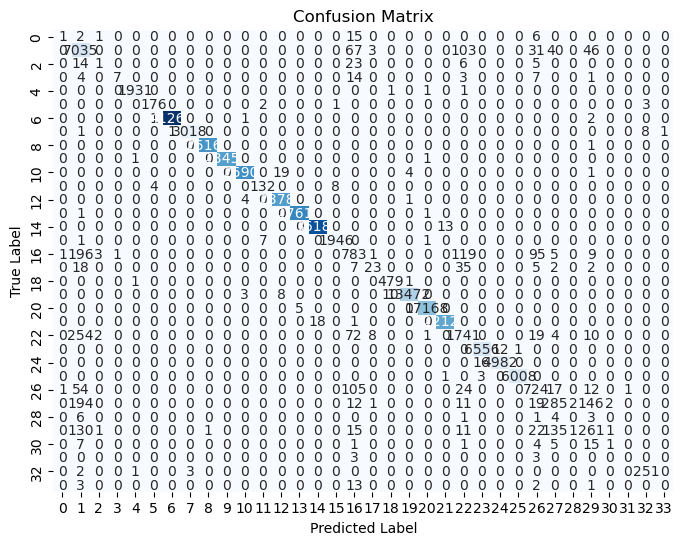

In [38]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

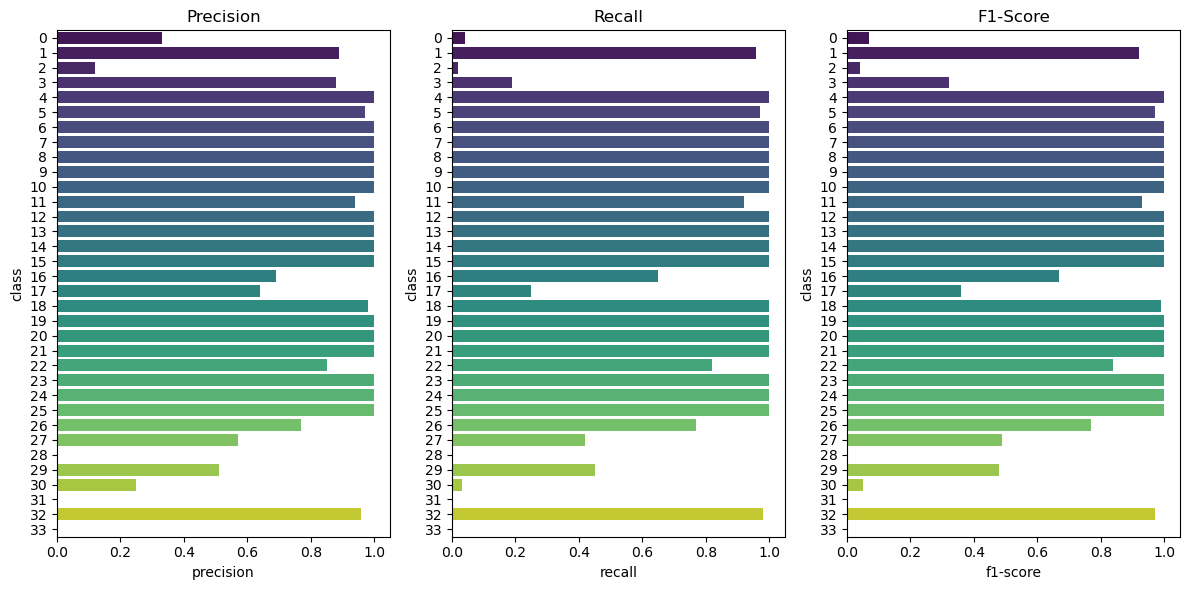

In [39]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in b.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()


#### Cat Boost

In [40]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train,y_train)

Learning rate set to 0.110419
0:	learn: 1.0833120	total: 2.24s	remaining: 37m 19s
1:	learn: 0.8653204	total: 4.27s	remaining: 35m 30s
2:	learn: 0.7491030	total: 6.28s	remaining: 34m 46s
3:	learn: 0.6627117	total: 8.25s	remaining: 34m 14s
4:	learn: 0.5927309	total: 10.3s	remaining: 34m 2s
5:	learn: 0.5370627	total: 12.2s	remaining: 33m 44s
6:	learn: 0.4844411	total: 14.2s	remaining: 33m 32s
7:	learn: 0.4368103	total: 16.1s	remaining: 33m 20s
8:	learn: 0.3989566	total: 18.1s	remaining: 33m 15s
9:	learn: 0.3610530	total: 20.1s	remaining: 33m 9s
10:	learn: 0.3312020	total: 22.1s	remaining: 33m 3s
11:	learn: 0.2985118	total: 24s	remaining: 32m 59s
12:	learn: 0.2757293	total: 26s	remaining: 32m 55s
13:	learn: 0.2517887	total: 28s	remaining: 32m 50s
14:	learn: 0.2334269	total: 30s	remaining: 32m 47s
15:	learn: 0.2163193	total: 32s	remaining: 32m 47s
16:	learn: 0.2033246	total: 34s	remaining: 32m 43s
17:	learn: 0.1917786	total: 35.9s	remaining: 32m 37s
18:	learn: 0.1802103	total: 37.8s	remaini

153:	learn: 0.0299119	total: 5m 9s	remaining: 28m 18s
154:	learn: 0.0298472	total: 5m 11s	remaining: 28m 16s
155:	learn: 0.0297484	total: 5m 13s	remaining: 28m 13s
156:	learn: 0.0297017	total: 5m 15s	remaining: 28m 11s
157:	learn: 0.0295984	total: 5m 17s	remaining: 28m 9s
158:	learn: 0.0295457	total: 5m 19s	remaining: 28m 7s
159:	learn: 0.0295167	total: 5m 20s	remaining: 28m 5s
160:	learn: 0.0293989	total: 5m 22s	remaining: 28m 3s
161:	learn: 0.0293474	total: 5m 24s	remaining: 28m
162:	learn: 0.0292886	total: 5m 27s	remaining: 27m 59s
163:	learn: 0.0292027	total: 5m 29s	remaining: 27m 57s
164:	learn: 0.0291314	total: 5m 31s	remaining: 27m 55s
165:	learn: 0.0290388	total: 5m 33s	remaining: 27m 53s
166:	learn: 0.0289924	total: 5m 35s	remaining: 27m 51s
167:	learn: 0.0289340	total: 5m 37s	remaining: 27m 49s
168:	learn: 0.0288841	total: 5m 39s	remaining: 27m 47s
169:	learn: 0.0287983	total: 5m 41s	remaining: 27m 45s
170:	learn: 0.0287200	total: 5m 43s	remaining: 27m 42s
171:	learn: 0.02867

304:	learn: 0.0234596	total: 10m 8s	remaining: 23m 6s
305:	learn: 0.0234373	total: 10m 10s	remaining: 23m 4s
306:	learn: 0.0234179	total: 10m 12s	remaining: 23m 2s
307:	learn: 0.0233952	total: 10m 14s	remaining: 23m
308:	learn: 0.0233771	total: 10m 16s	remaining: 22m 58s
309:	learn: 0.0233553	total: 10m 18s	remaining: 22m 56s
310:	learn: 0.0233464	total: 10m 20s	remaining: 22m 54s
311:	learn: 0.0233106	total: 10m 22s	remaining: 22m 52s
312:	learn: 0.0233021	total: 10m 24s	remaining: 22m 50s
313:	learn: 0.0232867	total: 10m 26s	remaining: 22m 48s
314:	learn: 0.0232752	total: 10m 28s	remaining: 22m 46s
315:	learn: 0.0232552	total: 10m 30s	remaining: 22m 44s
316:	learn: 0.0232346	total: 10m 32s	remaining: 22m 42s
317:	learn: 0.0232125	total: 10m 34s	remaining: 22m 40s
318:	learn: 0.0231925	total: 10m 36s	remaining: 22m 38s
319:	learn: 0.0231719	total: 10m 38s	remaining: 22m 36s
320:	learn: 0.0231485	total: 10m 40s	remaining: 22m 34s
321:	learn: 0.0231162	total: 10m 42s	remaining: 22m 32s


452:	learn: 0.0201265	total: 15m	remaining: 18m 7s
453:	learn: 0.0201181	total: 15m 2s	remaining: 18m 5s
454:	learn: 0.0201090	total: 15m 4s	remaining: 18m 3s
455:	learn: 0.0200934	total: 15m 6s	remaining: 18m 1s
456:	learn: 0.0200747	total: 15m 8s	remaining: 17m 59s
457:	learn: 0.0200600	total: 15m 10s	remaining: 17m 57s
458:	learn: 0.0200439	total: 15m 12s	remaining: 17m 55s
459:	learn: 0.0200340	total: 15m 14s	remaining: 17m 53s
460:	learn: 0.0200210	total: 15m 16s	remaining: 17m 51s
461:	learn: 0.0200097	total: 15m 18s	remaining: 17m 49s
462:	learn: 0.0199954	total: 15m 20s	remaining: 17m 47s
463:	learn: 0.0199877	total: 15m 22s	remaining: 17m 45s
464:	learn: 0.0199676	total: 15m 24s	remaining: 17m 43s
465:	learn: 0.0199527	total: 15m 26s	remaining: 17m 41s
466:	learn: 0.0199380	total: 15m 28s	remaining: 17m 39s
467:	learn: 0.0199261	total: 15m 30s	remaining: 17m 37s
468:	learn: 0.0199188	total: 15m 32s	remaining: 17m 35s
469:	learn: 0.0198978	total: 15m 34s	remaining: 17m 33s
470:

600:	learn: 0.0181461	total: 19m 53s	remaining: 13m 12s
601:	learn: 0.0181313	total: 19m 55s	remaining: 13m 10s
602:	learn: 0.0181206	total: 19m 57s	remaining: 13m 8s
603:	learn: 0.0181070	total: 19m 59s	remaining: 13m 6s
604:	learn: 0.0180983	total: 20m 1s	remaining: 13m 4s
605:	learn: 0.0180912	total: 20m 3s	remaining: 13m 2s
606:	learn: 0.0180805	total: 20m 5s	remaining: 13m
607:	learn: 0.0180620	total: 20m 7s	remaining: 12m 58s
608:	learn: 0.0180500	total: 20m 9s	remaining: 12m 56s
609:	learn: 0.0180439	total: 20m 11s	remaining: 12m 54s
610:	learn: 0.0180367	total: 20m 13s	remaining: 12m 52s
611:	learn: 0.0180201	total: 20m 15s	remaining: 12m 50s
612:	learn: 0.0180077	total: 20m 17s	remaining: 12m 48s
613:	learn: 0.0179991	total: 20m 19s	remaining: 12m 46s
614:	learn: 0.0179908	total: 20m 21s	remaining: 12m 44s
615:	learn: 0.0179847	total: 20m 23s	remaining: 12m 42s
616:	learn: 0.0179736	total: 20m 25s	remaining: 12m 40s
617:	learn: 0.0179663	total: 20m 27s	remaining: 12m 38s
618:	

749:	learn: 0.0164700	total: 24m 48s	remaining: 8m 16s
750:	learn: 0.0164582	total: 24m 50s	remaining: 8m 14s
751:	learn: 0.0164505	total: 24m 52s	remaining: 8m 12s
752:	learn: 0.0164458	total: 24m 54s	remaining: 8m 10s
753:	learn: 0.0164384	total: 24m 56s	remaining: 8m 8s
754:	learn: 0.0164341	total: 24m 58s	remaining: 8m 6s
755:	learn: 0.0164253	total: 25m	remaining: 8m 4s
756:	learn: 0.0164073	total: 25m 2s	remaining: 8m 2s
757:	learn: 0.0164020	total: 25m 4s	remaining: 8m
758:	learn: 0.0163951	total: 25m 6s	remaining: 7m 58s
759:	learn: 0.0163874	total: 25m 8s	remaining: 7m 56s
760:	learn: 0.0163635	total: 25m 10s	remaining: 7m 54s
761:	learn: 0.0163527	total: 25m 12s	remaining: 7m 52s
762:	learn: 0.0163363	total: 25m 14s	remaining: 7m 50s
763:	learn: 0.0163216	total: 25m 16s	remaining: 7m 48s
764:	learn: 0.0163171	total: 25m 18s	remaining: 7m 46s
765:	learn: 0.0163096	total: 25m 19s	remaining: 7m 44s
766:	learn: 0.0162998	total: 25m 21s	remaining: 7m 42s
767:	learn: 0.0162804	tota

900:	learn: 0.0149710	total: 29m 46s	remaining: 3m 16s
901:	learn: 0.0149603	total: 29m 48s	remaining: 3m 14s
902:	learn: 0.0149570	total: 29m 50s	remaining: 3m 12s
903:	learn: 0.0149511	total: 29m 52s	remaining: 3m 10s
904:	learn: 0.0149351	total: 29m 54s	remaining: 3m 8s
905:	learn: 0.0149291	total: 29m 56s	remaining: 3m 6s
906:	learn: 0.0149168	total: 29m 58s	remaining: 3m 4s
907:	learn: 0.0149104	total: 29m 59s	remaining: 3m 2s
908:	learn: 0.0149014	total: 30m 1s	remaining: 3m
909:	learn: 0.0148953	total: 30m 3s	remaining: 2m 58s
910:	learn: 0.0148865	total: 30m 5s	remaining: 2m 56s
911:	learn: 0.0148793	total: 30m 7s	remaining: 2m 54s
912:	learn: 0.0148733	total: 30m 9s	remaining: 2m 52s
913:	learn: 0.0148626	total: 30m 11s	remaining: 2m 50s
914:	learn: 0.0148572	total: 30m 13s	remaining: 2m 48s
915:	learn: 0.0148483	total: 30m 15s	remaining: 2m 46s
916:	learn: 0.0148412	total: 30m 17s	remaining: 2m 44s
917:	learn: 0.0148325	total: 30m 19s	remaining: 2m 42s
918:	learn: 0.0148242	t

In [41]:
pred = model.predict(X_test)

In [42]:
c = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.89      0.97      0.93      7325
           2       0.50      0.04      0.08        49
           3       0.86      0.17      0.28        36
           4       1.00      0.99      0.99      1934
           5       0.96      0.94      0.95       182
           6       1.00      1.00      1.00     41266
           7       0.98      0.99      0.99      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       1.00      1.00      1.00     25928
          11       0.88      0.92      0.90       144
          12       1.00      1.00      1.00     23791
          13       1.00      1.00      1.00     27619
          14       1.00      1.00      1.00     36195
          15       0.99      0.99      0.99      1955
          16       0.72      0.65      0.69      1213
          17       0.63    

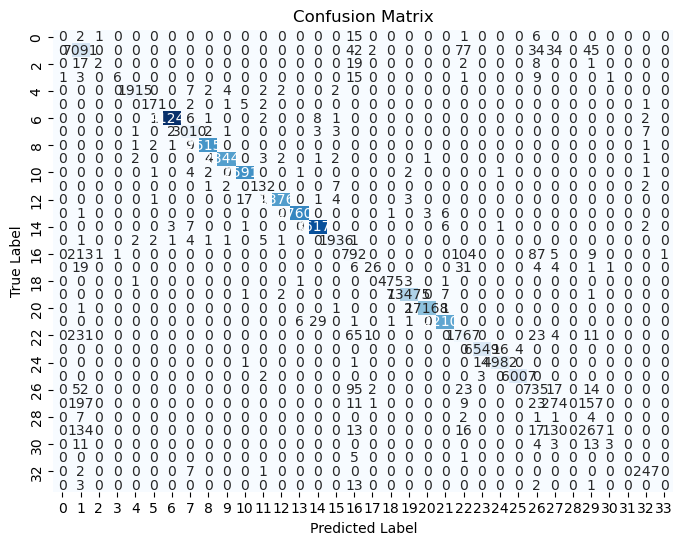

In [43]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

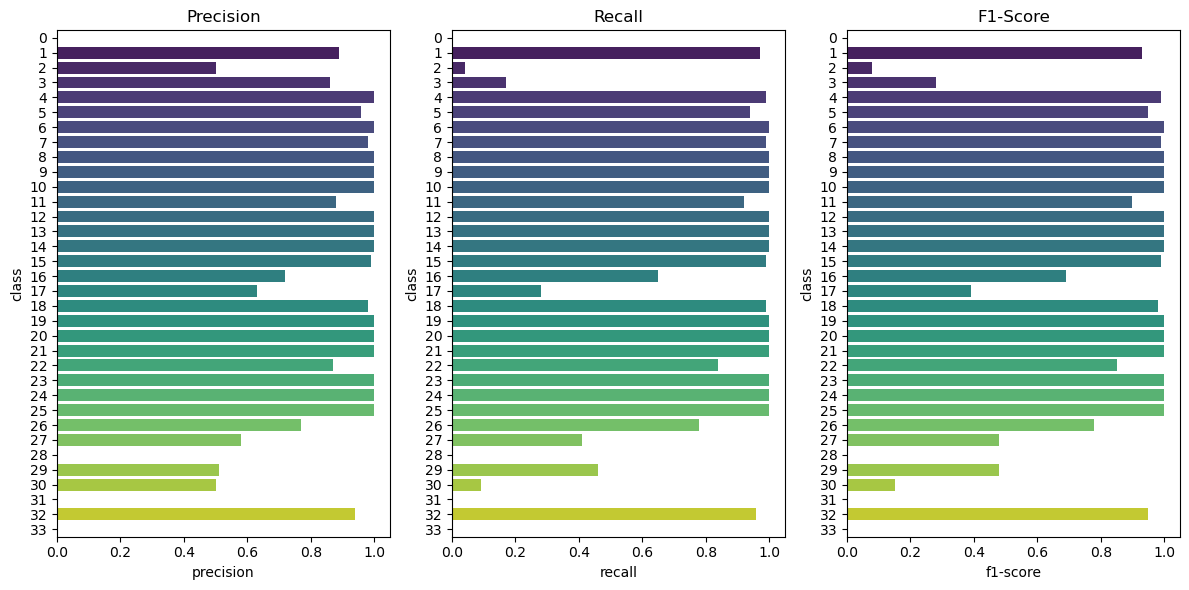

In [44]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in c.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()


#### AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [72]:
pred = model.predict(X_test)

In [73]:
accuracy_score(y_test,pred)

0.7111282917268553

In [74]:
d = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.75      1.00      0.86      7325
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        36
           4       0.84      0.89      0.87      1934
           5       0.00      0.00      0.00       182
           6       1.00      1.00      1.00     41266
           7       0.98      0.96      0.97      3029
           8       0.97      0.05      0.10     25170
           9       1.00      1.00      1.00     23457
          10       0.39      1.00      0.56     25928
          11       0.00      0.00      0.00       144
          12       0.96      0.29      0.45     23791
          13       0.76      0.89      0.82     27619
          14       0.72      0.93      0.81     36195
          15       0.00      0.00      0.00      1955
          16       0.81      0.57      0.67      1213
          17       0.00    

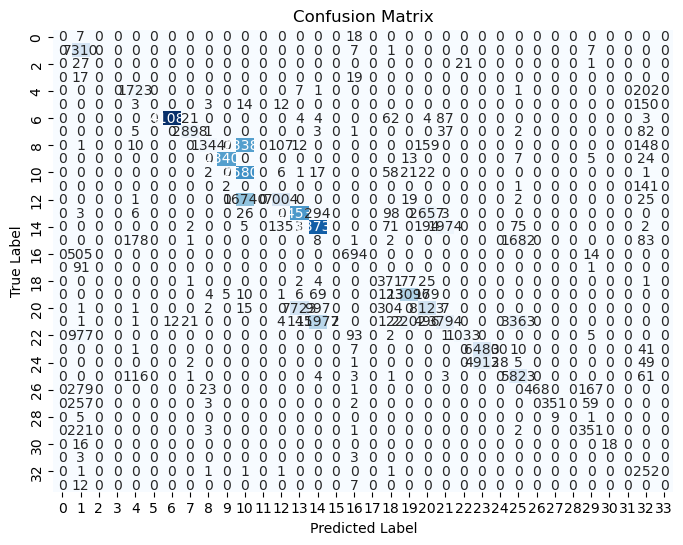

In [75]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

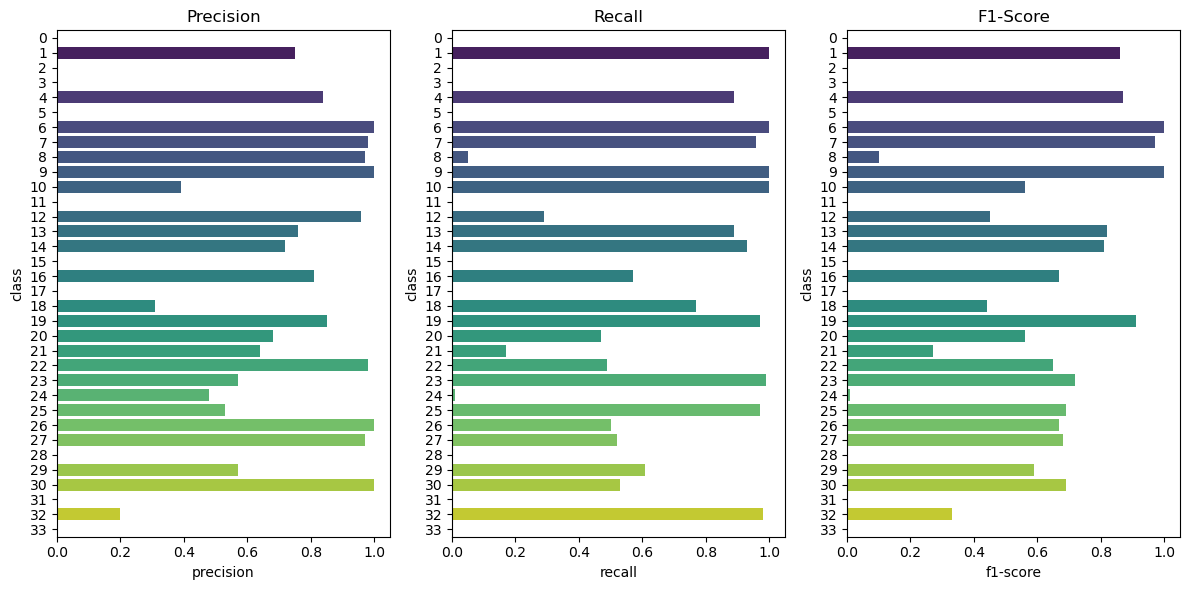

In [76]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in d.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()


Before using algorithms like logistic regression and KNN, we need to Scale the data


In [77]:
# importing Standard Scaler for standardizing
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [105]:
pred = model.predict(X_test)

In [106]:
accuracy_score(y_test,pred)

0.9404657755352553

In [107]:
e = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.73      0.97      0.83      7325
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        36
           4       0.98      0.98      0.98      1934
           5       0.67      0.70      0.69       182
           6       1.00      1.00      1.00     41266
           7       0.97      0.98      0.97      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       0.90      0.96      0.93     25928
          11       0.57      0.62      0.60       144
          12       0.98      0.95      0.96     23791
          13       0.92      0.98      0.95     27619
          14       0.91      0.95      0.93     36195
          15       0.98      0.98      0.98      1955
          16       0.51      0.33      0.40      1213
          17       1.00    

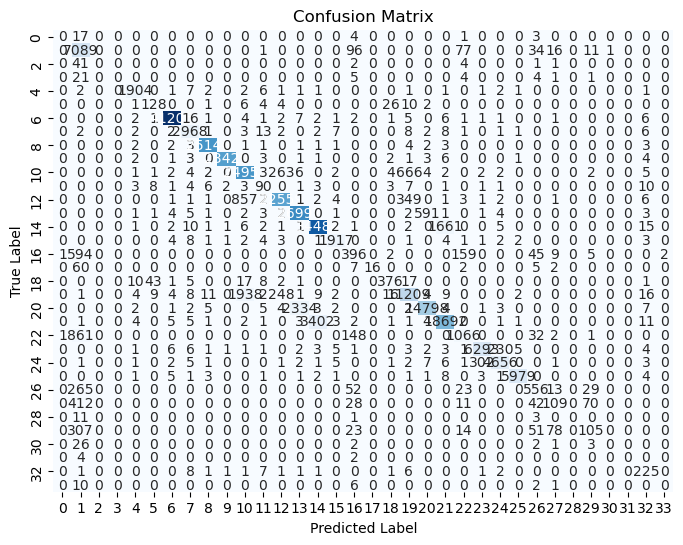

In [108]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

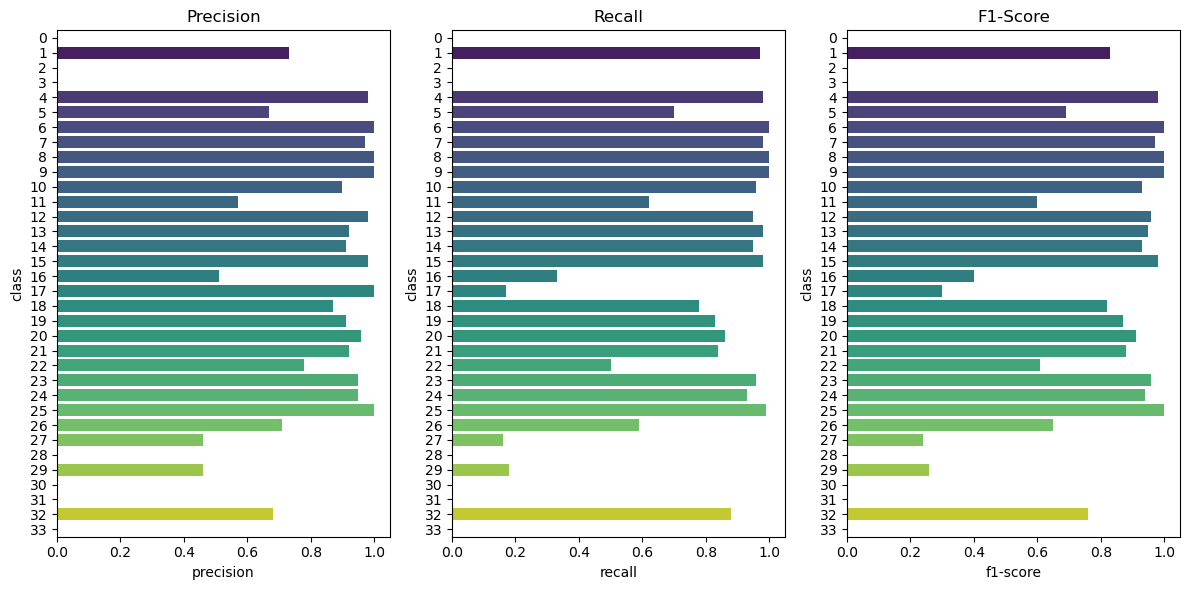

In [109]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in e.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()


#### Logistic Regression


In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [112]:
pred = model.predict(X_test)

In [113]:
accuracy_score(y_test,pred)

0.7937987019592684

In [114]:
f = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.70      0.94      0.80      7325
           2       0.00      0.00      0.00        49
           3       1.00      0.17      0.29        36
           4       0.97      0.98      0.98      1934
           5       0.58      0.60      0.59       182
           6       1.00      1.00      1.00     41266
           7       0.99      0.97      0.98      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       0.65      0.96      0.78     25928
          11       0.40      0.15      0.22       144
          12       0.76      0.72      0.74     23791
          13       0.63      0.96      0.76     27619
          14       0.70      0.97      0.81     36195
          15       0.97      0.98      0.97      1955
          16       0.32      0.16      0.22      1213
          17       1.00    

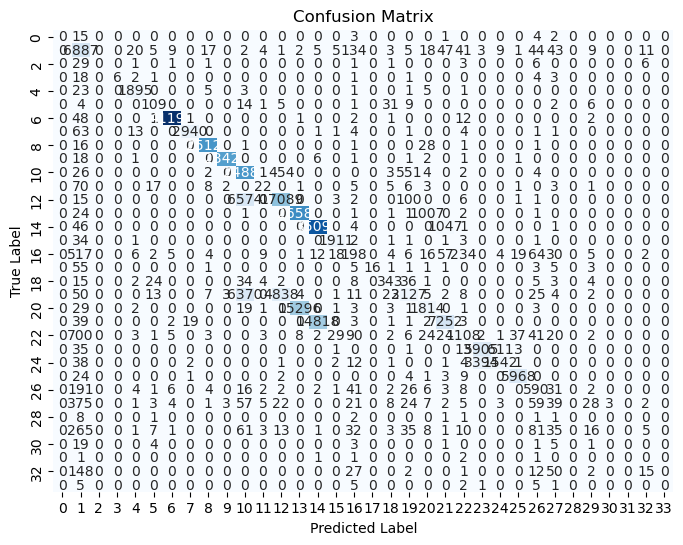

In [115]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

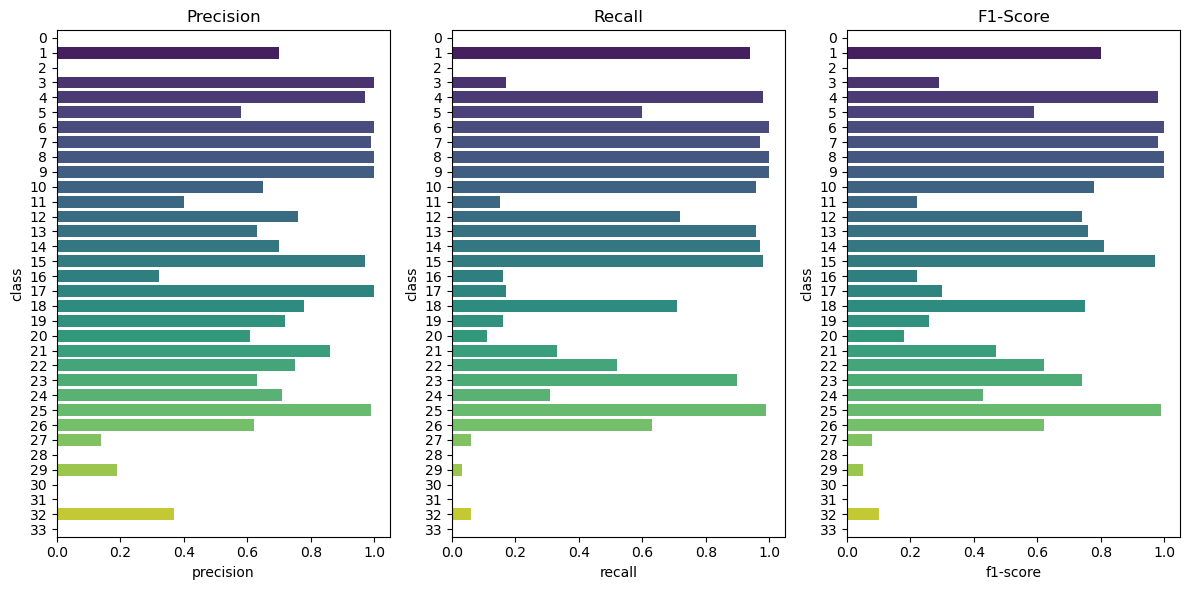

In [121]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in f.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()
